In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
def read_file(filename):
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        data = []
        i=1
        for row in readCSV:
            if len(row)==3 and i>3:
                point = row[0]
                data.append(float(point))
            i+=1
        return data

In [3]:
def movingaverage(vec, window_size):
    cumsum_vec = np.cumsum(np.insert(vec, 0, 0)) 
    ma_vec = (cumsum_vec[window_size:] - cumsum_vec[:-window_size]) / window_size
    return ma_vec

In [4]:
ASCEND2020 = './training_ASCEND_Lunar/backprop_logs_dqn_lr_'
JAIS2021 = './training_JAIS_Lunar/logs_dqn_lr_'

<IPython.core.display.Javascript object>


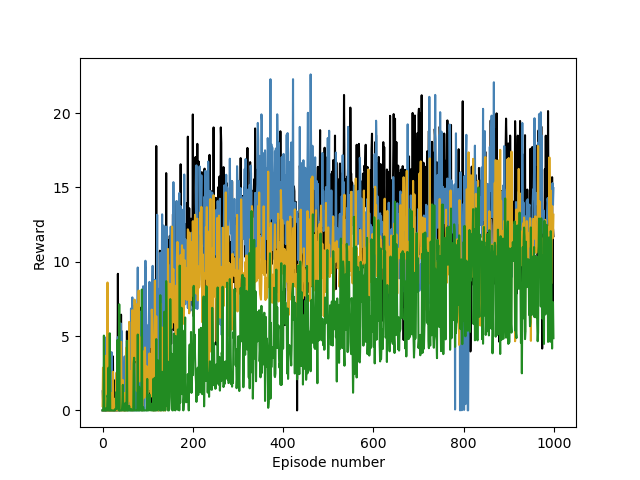

In [5]:
filename_to_plot=JAIS2021


colors = ['black', 'steelblue', 'goldenrod', 'forestgreen', 'deeppink','red','lime']
# lrs = ['0.1','0.01', '0.001','0.0001','1e-05']
# lrs = ['0.1','0.01', '0.001','0.0001']
lrs = ['0.01', '0.001','0.0001','1e-05']
# lrs = ['0.01', '0.001','0.0001']
# lrs = ['0.001','0.0001']
# lrs = ['0.01','0.001']
# lrs = ['0.01','0.001']
%matplotlib notebook
fig = plt.figure()
i=0
for lr in lrs:
    data = read_file(filename_to_plot+lr+'/monitor.csv')
    plt.plot(range(len(data)), data, colors[i]) 
    i+=1

# naming the x axis 
plt.xlabel('Episode number') 
# naming the y axis 
plt.ylabel('Reward') 
# function to show the plot 
plt.show() 

<IPython.core.display.Javascript object>


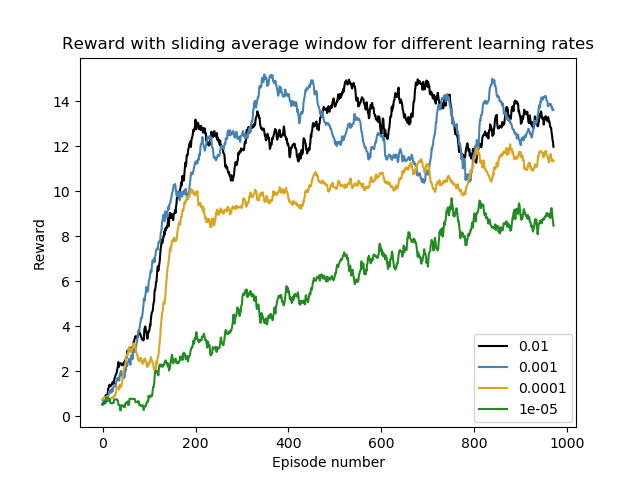

In [6]:
window_size = 30

%matplotlib notebook
fig = plt.figure()
i=0
for lr in lrs:
    data = read_file(filename_to_plot+lr+'/monitor.csv')
    scores_SAW = movingaverage(data, window_size)
    plt.plot(range(len(scores_SAW)), scores_SAW, colors[i], label=lr)
    i+=1

plt.title('Reward with sliding average window for different learning rates')
plt.xlabel('Episode number')
plt.ylabel('Reward')
fig.legend(loc = (0.74, 0.12))
plt.show()

In [39]:
# fig.savefig('learning_JAIS.png', format='png', dpi=300)